Importing the Dependencies

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Data Collection

In [10]:
# loading the dataset to a Pandas DataFrame
stress_dataset = pd.read_csv(r'C:\Users\Ayush\Desktop\Sleep-prediction-main\Sleep-prediction-main\stress.csv')

In [11]:
# number of rows & columns in the dataset
stress_dataset.shape

(630, 9)

In [12]:
# first 5 rows of the dataset
stress_dataset.head()

,sr,rr,t,lm,bo,rem,sl,hr,st
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [13]:
# checking for missing values
stress_dataset.isnull().sum()

sr     0
rr     0
t      0
lm     0
bo     0
rem    0
sl     0
hr     0
st     0
dtype: int64

Data Analysis and Visulaization

In [14]:
# statistical measures of the dataset
stress_dataset.describe()

,sr,rr,t,lm,bo,rem,sl,hr,st
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,2.000000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,1.415337
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,2.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,3.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,4.000000


c:\Users\Ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


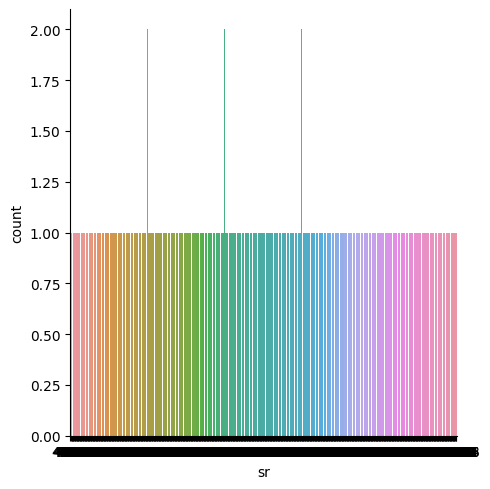

In [15]:
# number of values for each quality
sns.catplot(x='sr', data = stress_dataset, kind = 'count')

<Axes: xlabel='lm', ylabel='bo'>

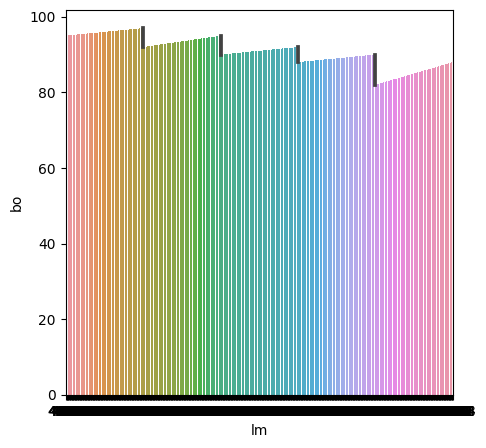

In [16]:
# volatile acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='lm', y = 'bo', data = stress_dataset)

<Axes: xlabel='st', ylabel='sl'>

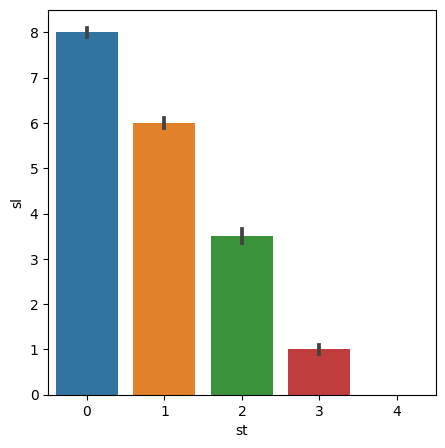

In [17]:
# citric acid vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='st', y = 'sl', data = stress_dataset)

Correlation

1. Positive Correlation
2. Negative Correlation

In [18]:
correlation = stress_dataset.corr()

<Axes: >

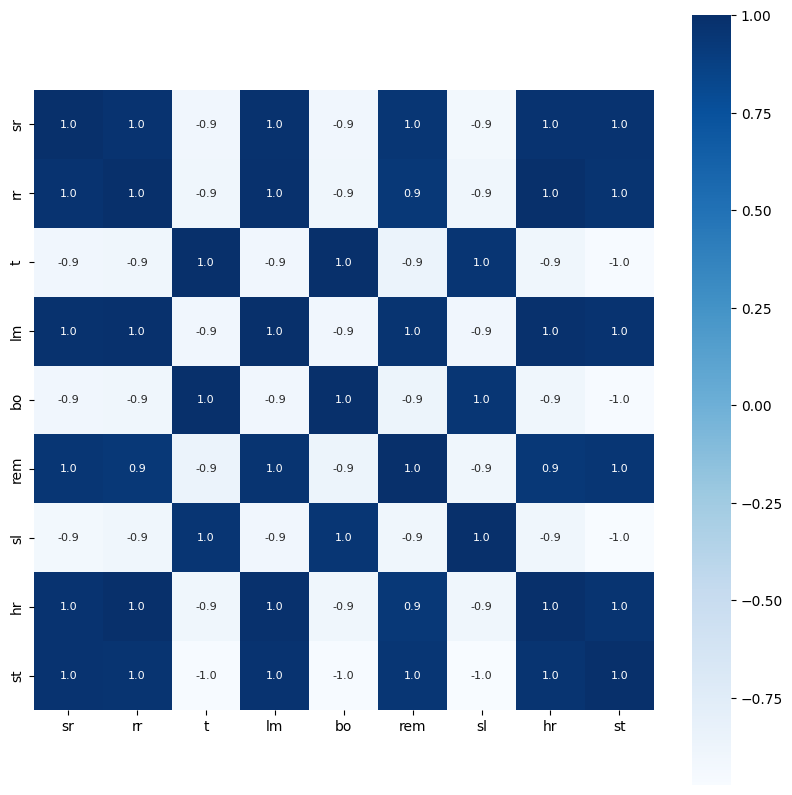

In [19]:
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

Data Preprocessing

In [20]:
# separate the data and Label
X = stress_dataset.drop('sl',axis=1)

In [21]:
print(X)

         sr      rr       t      lm      bo     rem     hr  st
0    93.800  25.680  91.840  16.600  89.840   99.60  74.20   3
1    91.640  25.104  91.552  15.880  89.552   98.88  72.76   3
2    60.000  20.000  96.000  10.000  95.000   85.00  60.00   1
3    85.760  23.536  90.768  13.920  88.768   96.92  68.84   3
4    48.120  17.248  97.872   6.496  96.248   72.48  53.12   0
..      ...     ...     ...     ...     ...     ...    ...  ..
625  69.600  20.960  92.960  10.960  90.960   89.80  62.40   2
626  48.440  17.376  98.064   6.752  96.376   73.76  53.44   0
627  97.504  27.504  86.880  17.752  84.256  101.88  78.76   4
628  58.640  19.728  95.728   9.728  94.592   84.32  59.32   1
629  73.920  21.392  93.392  11.392  91.392   91.96  63.48   2

[630 rows x 8 columns]


Label Binarizaton

In [22]:
Y = stress_dataset['sl'].apply(lambda y_value: 1 if y_value>=3 else 0)

In [23]:
print(Y)

0      0
1      0
2      1
3      0
4      1
      ..
625    1
626    1
627    0
628    1
629    1
Name: sl, Length: 630, dtype: int64


Train & Test Split

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [25]:
print(Y.shape, Y_train.shape, Y_test.shape)

(630,) (504,) (126,)


Model Training:

Random Forest Classifier

In [26]:
model = RandomForestClassifier()

In [27]:
model.fit(X_train, Y_train)

RandomForestClassifier()

Model Evaluation

Accuracy Score

In [28]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [29]:
print('Accuracy : ', test_data_accuracy)

Accuracy :  1.0


Building a Predictive System

In [30]:
input_data = (55.52,19.104,95.104,9.104,93.656,82.76,57.76,1)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good sleep')
else:
  print('Bad sleep')

[1]
Good sleep


c:\Users\Ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [31]:
model.save('my_model1')


AttributeError: 'RandomForestClassifier' object has no attribute 'save'

In [40]:
import streamlit as st
import numpy as np
import joblib

# Load the trained model
model = joblib.load('your_model.pkl')

st.title('Sleep Quality Predictor')

st.sidebar.header('User Input')

# Input features
sr = st.sidebar.number_input('Sleep Rating (0-10)', min_value=0, max_value=10, value=5)
rr = st.sidebar.number_input('Restfulness Rating (0-10)', min_value=0, max_value=10, value=5)
t = st.sidebar.number_input('Temperature (°C)', min_value=0.0, max_value=100.0, value=25.0)
lm = st.sidebar.number_input('Light in Room (0-1)', min_value=0.0, max_value=1.0, value=0.5)
bo = st.sidebar.number_input('Background Noise (0-1)', min_value=0.0, max_value=1.0, value=0.5)
rem = st.sidebar.number_input('REM Sleep (%)', min_value=0.0, max_value=100.0, value=20.0)
hr = st.sidebar.number_input('Heart Rate (bpm)', min_value=30, max_value=200, value=75)
stress_level = st.sidebar.number_input('Stress Level (0-10)', min_value=0, max_value=10, value=5)

if st.button('Predict Sleep Quality'):
    # Create a feature vector from user input
    input_data = np.array([sr, rr, t, lm, bo, rem, hr, stress_level])

    # Reshape the data for prediction
    input_data_reshaped = input_data.reshape(1, -1)

    # Make a prediction
    prediction = model.predict(input_data_reshaped)

    st.subheader('Prediction Result')

    if prediction[0] == 1:
        st.write('Good sleep')
    else:
        st.write('Bad sleep')


In [33]:
pip install streamlit

     ---------------------------------------- 7.6/7.6 MB 345.3 kB/s eta 0:00:00
     ------------------------------------ 516.2/516.2 kB 623.0 kB/s eta 0:00:00
     ---------------------------------------- 24.3/24.3 MB 1.0 MB/s eta 0:00:00
     ---------------------------------------- 4.8/4.8 MB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 82.0/82.0 kB 1.2 MB/s eta 0:00:00
     -------------------------------------- 55.8/55.8 kB 970.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
joblib.dump(model, 'your_model.pkl')

['your_model.pkl']